In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Load the California housing dataset
california = fetch_california_housing()
# Create a DataFrame from the feature data
df = pd.DataFrame(data=california.data, columns=california.feature_names)
df.shape

(20640, 8)

In [2]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [3]:
df.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24


In [4]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

#check missing values
df.isnull().any()

#Check duplicate rows
df.duplicated()

Missing Values:
 MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64


0        False
1        False
2        False
3        False
4        False
         ...  
20635    False
20636    False
20637    False
20638    False
20639    False
Length: 20640, dtype: bool

In [5]:
# Perform descriptive statistics
statistics = df.describe()

# Print the descriptive statistics
print(statistics)

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude  
count  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704  
std       10.386050      2.135952      2.003532  
min        0.692308     32.540000   -124.350000  
25%        2.429741     33.930000   -1

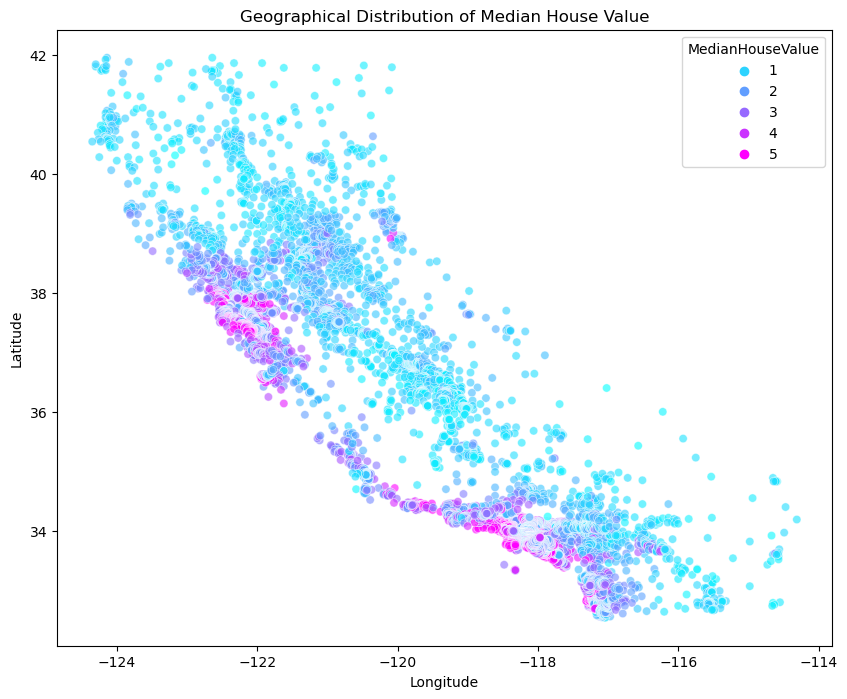

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
# Add the target variable to the DataFrame
df['MedianHouseValue'] = california.target

# Extract latitude and longitude columns
latitude = df['Latitude']
longitude = df['Longitude']

# Visualize the geographical distribution
plt.figure(figsize=(10, 8))
sns.scatterplot(x=longitude, y=latitude, hue=df['MedianHouseValue'], palette='cool', alpha=0.6)
plt.title('Geographical Distribution of Median House Value')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

C:\Users\mtalh\AppData\Local\Temp\ipykernel_12088\2901214796.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x='MedianHouseValue', kde=True, palette=custom_palette)


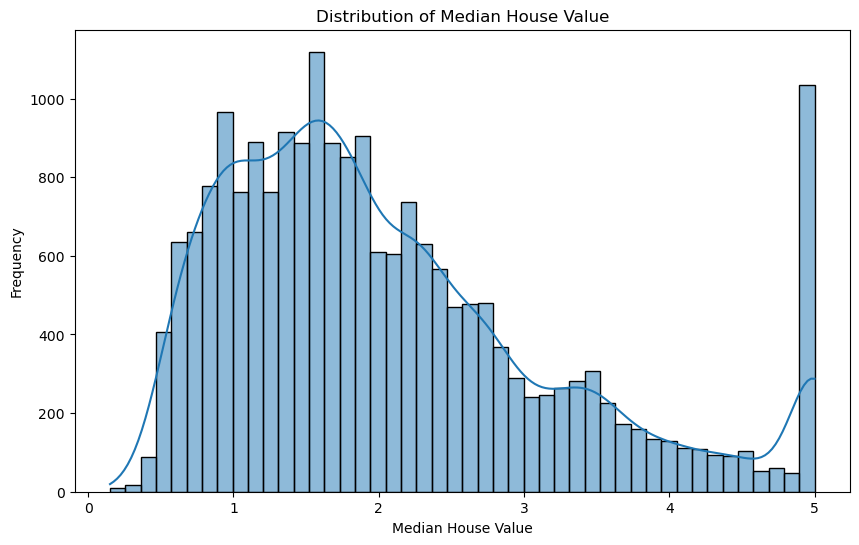

In [7]:
# Add the target variable to the DataFrame
df['MedianHouseValue'] = california.target

# Customize color palette
custom_palette = ['#FF5733', '#FFC300', '#900C3F', '#138D75', '#2E86C1']

# Visualize the distribution of Median House Value
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='MedianHouseValue', kde=True, palette=custom_palette)
plt.title('Distribution of Median House Value')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.show()

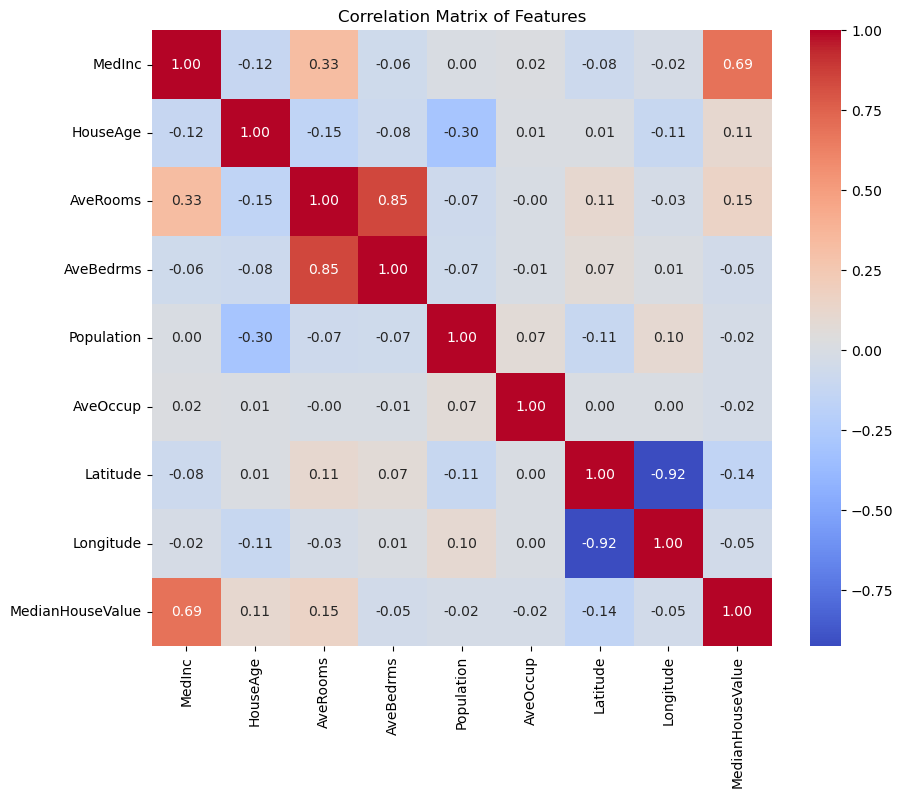

In [8]:
# Add the target variable to the DataFrame
df['MedianHouseValue'] = california.target

# Calculate the correlation matrix
corr_matrix = df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

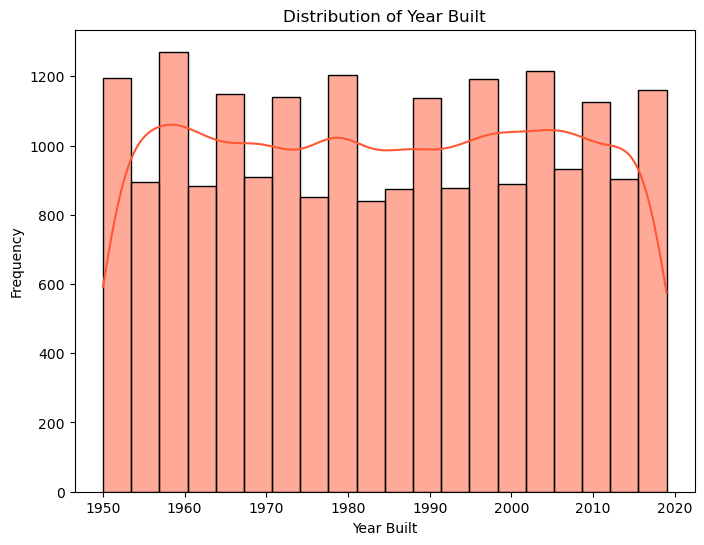

In [9]:
# Temporal Analysis
# Assuming you have a temporal feature in your dataset, let's say "YearBuilt"
df['YearBuilt'] = np.random.choice(range(1950, 2020), size=len(df))
df['YearBuilt'] = pd.to_datetime(df['YearBuilt'], format='%Y')
df['Year'] = df['YearBuilt'].dt.year
df['Month'] = df['YearBuilt'].dt.month

# Data Visualization
# Visualizing the distribution of the 'YearBuilt' feature
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='YearBuilt', bins=20, kde=True, color='#FF5733')
plt.title('Distribution of Year Built')
plt.xlabel('Year Built')
plt.ylabel('Frequency')
plt.show()

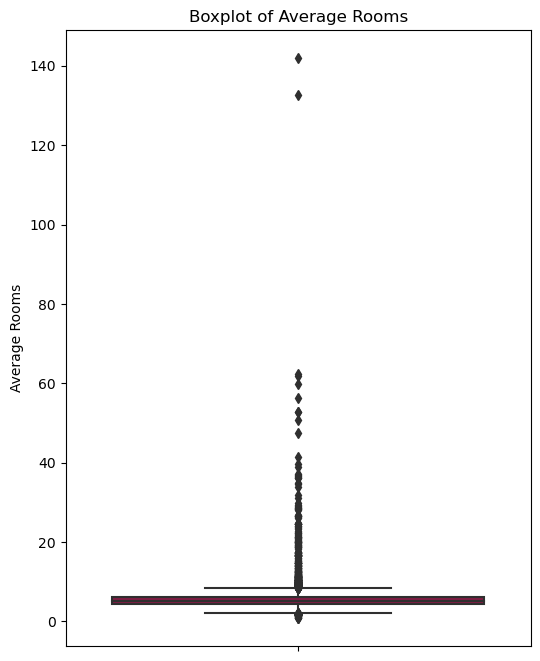

In [10]:
# Outlier Detection
# Assuming 'AveRooms' is a feature, let's detect outliers using boxplot
plt.figure(figsize=(6, 8))
sns.boxplot(y=df['AveRooms'], color='#900C3F')
plt.title('Boxplot of Average Rooms')
plt.ylabel('Average Rooms')
plt.show()


In [11]:
# Feature Engineering
# Let's create a new feature 'RoomsPerHousehold' by dividing 'AveRooms' by 'AveBedrms'
df['RoomsPerHousehold'] = df['AveRooms'] / df['AveBedrms']

# Print the updated DataFrame
print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedianHouseValue  YearBuilt  Year  Month  RoomsPerHousehold  
0    -122.23             4.526 1958-01-01  1958      1           6.821705  
1    -122.22             3.585 1962-01-01  1962      1           6.418626  
2    -122.24             3.521 2016-01-01  2016      1           7.721053  
3    -122.25             3.413 1994-01-01  1994      1           5.421277  
4    -122.25             3.422 2002-01-01  2002      1           5.810714  


In [12]:
# Summary Statistics
summary_statistics = df.describe()
print("Summary Statistics:\n", summary_statistics)

Summary Statistics:
              MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude  MedianHouseValue  \
count  20640.000000  20640.000000  20640.000000      20640.000000   
mean       3.070655     35.631861   -119.569704          2.068558   
std       10.386050      2.135952      2.003532          1.1